In [2]:

def RNNpseudo ():
  state_t = 0
  for input_t in input_sequence:
    output_t =  activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

In [3]:
#Simple RNN forward Pass

In [1]:
import numpy as np

In [2]:
timesteps = 100
input_feature = 32
output_feature = 64

In [4]:
input = np.random.random((timesteps,input_feature))
state_t = np.zeros((output_feature,))

In [5]:
W = np.random.random((output_feature,input_feature))
U = np.random.random((output_feature,output_feature))
b= np.random.random((output_feature,))

In [11]:
succesive_outputs = []

In [12]:
for input_t in input:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  succesive_outputs.append(output_t)
  state_t = output_t
final_output_sequence = np.concatenate(succesive_outputs,axis = 0)  

In [13]:
import tensorflow

In [14]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = 1000)

17473536/17464789 [==============================] - 0s 0us/step


In [16]:
max_features = 1000
maxlen = 500
batch_szie = 32

In [17]:
x_train = pad_sequences(x_train,maxlen = maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [19]:
from tensorflow.keras.layers import Embedding, SimpleRNN,Dense
from tensorflow.keras.models import Sequential

In [21]:
network = Sequential([
                      Embedding(max_features,32),
                      SimpleRNN(32),
                      Dense(units = 1,activation = 'sigmoid')
])

In [22]:
network.compile(loss= 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [23]:
history = network.fit(x_train,y_train,epochs = 10,batch_size=128,validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 25s 150ms/step - loss: 0.5994 - accuracy: 0.6632 - val_loss: 0.4557 - val_accuracy: 0.8024
Epoch 2/10
157/157 [==============================] - 23s 147ms/step - loss: 0.4164 - accuracy: 0.8201 - val_loss: 0.4005 - val_accuracy: 0.8326
Epoch 3/10
157/157 [==============================] - 23s 145ms/step - loss: 0.4752 - accuracy: 0.7676 - val_loss: 0.6960 - val_accuracy: 0.5754
Epoch 4/10
157/157 [==============================] - 23s 146ms/step - loss: 0.6000 - accuracy: 0.6672 - val_loss: 0.6321 - val_accuracy: 0.6298
Epoch 5/10
157/157 [==============================] - 23s 146ms/step - loss: 0.5536 - accuracy: 0.7184 - val_loss: 0.6243 - val_accuracy: 0.6380
Epoch 6/10
157/157 [==============================] - 23s 146ms/step - loss: 0.5114 - accuracy: 0.7516 - val_loss: 0.6245 - val_accuracy: 0.6478
Epoch 7/10
157/157 [==============================] - 23s 144ms/step - loss: 0.4655 - accuracy: 0.7849 - val_loss: 0.6344 - val_ac

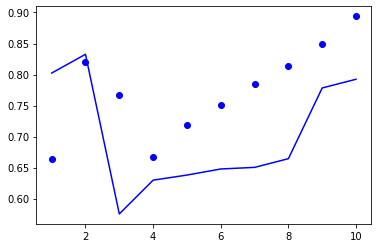

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')


In [26]:
network.save('Simple_RNN_IMDB.h5')

In [27]:
#LSTM MODEL

In [29]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 62s 341ms/step - loss: 0.5544 - acc: 0.7251 - val_loss: 0.5096 - val_acc: 0.7486
Epoch 2/10
157/157 [==============================] - 53s 337ms/step - loss: 0.4092 - acc: 0.8220 - val_loss: 0.3934 - val_acc: 0.8350
Epoch 3/10
157/157 [==============================] - 53s 337ms/step - loss: 0.3662 - acc: 0.8446 - val_loss: 0.3469 - val_acc: 0.8596
Epoch 4/10
157/157 [==============================] - 51s 328ms/step - loss: 0.3471 - acc: 0.8523 - val_loss: 0.4497 - val_acc: 0.7920
Epoch 5/10
157/157 [==============================] - 52s 334ms/step - loss: 0.3333 - acc: 0.8623 - val_loss: 0.3377 - val_acc: 0.8582
Epoch 6/10
157/157 [==============================] - 52s 331ms/step - loss: 0.3280 - acc: 0.8648 - val_loss: 0.3691 - val_acc: 0.8394
Epoch 7/10
157/157 [==============================] - 52s 330ms/step - loss: 0.3187 - acc: 0.8681 - val_loss: 0.4275 - val_acc: 0.8126
Epoch 8/10
157/157 [==============================] - 5

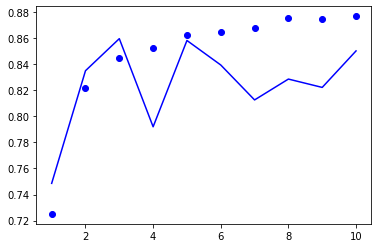

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')